# EDA for Titanic Survival

- Basic Titanic Tutorial: 
    - https://www.kaggle.com/code/alexisbcook/titanic-tutorial
    - https://www.kaggle.com/code/amitkumarjaiswal/beginner-s-tutorial-to-titanic-using-scikit-learn
- User-manual of Pandas (a dataframe work): https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- User-manual of NumPy (relatively fast multidimensional matrix/array library with many scientific functions): https://numpy.org/doc/stable/user/index.html#user
- Comprehensive Titanic facts including their statistics: 
    - https://titanicfacts.net/
    - https://www.encyclopedia-titanica.org/

#### Strategies

- Choose/create some dependent features on Survived using the $\chi^2$ test for example.
- Choose those features with |Prob(Survived=1) - Prob(Survived=0)| > Threshold so that the classification effects meaningfully.

### 1. Import some basic python and dataframe libraries

In [1]:
import os #Some functions for the os related commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For plotting graphs
import seaborn as sns

#Display the data file names
for dirname, _, filenames in os.walk('titanic_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic_data/gender_submission.csv
titanic_data/test.csv
titanic_data/train.csv
titanic_data/test_preprocessed_JB.csv
titanic_data/train_preprocessed_JB.csv
titanic_data/train_preprocessed_dropped_JB.csv
titanic_data/test_preprocessed_dropped_JB.csv


### 2. Load the train and test data 

In [2]:
train_data = pd.read_csv("titanic_data/train.csv")
train_data.head() #Display first 5 rows in train.csv in the pandas dataframe format.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Note**: Some cells with 'NaN' in rows have data missing. 
- Survived - 1 if a passenger survived and 0 otherwise. 
- Pclass - passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Sibsp - number of siblings/spouses aboard
- Parch - number of parents/children aboard
- Ticket - number printed on the ticket 
- Cabin - deck/room number. It turns out that the initial letter of Cabin represents the deck, which affects the survival.
- Embarked - port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
test_data = pd.read_csv("titanic_data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

**NOTE**:
- There are many NaN's in Age (177/891 and 86/418) and Cabin (687/891 and 327/418) in both (train_data and test_data), respectively.
- Embarked in train_data has 3 NaN's.

#### Data Types

| Feature      | Statistical Data Type |
| :---        |   ---: |
| PassengerId | Numerical |
| Survived   | Categorical* |
|Pclass| Categorical*  |
|Name| Categorical |
|Sex| Categorical  |
|Age| Numerical |
|SibSp | Numerical |
| Parch| Numerical |
|Ticket | Categorical*  |
|Fare | Numerical |
|Cabin | Categorical*  |
|Embarked | Categorical*  |

Categorical* = Possibly convertible to  Numerical

#### Combine train_data and test_data

In [5]:
cd = pd.concat([train_data, test_data], ignore_index=True)

#### Summary for Categorical and Numberical separately

In [6]:
print(cd.describe(include=object))

                        Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914


- Name are all unique in both train_data and test_data.
- Cabin can have multiple cabins: It should be related with SibSp and Parch.
- Again, there are many NaN's in Age and Cabin in both train_data and test_data.
- There are also ticket numbers assigned to multiple passengers in Ticket of both train_data and test_data.
- There are more males (577/891 and 266/418) for (train_data and test_data), respectively, on board.

In [7]:
print(cd.describe(exclude=object))

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


### 3. Sex

In [8]:
cd.groupby(['Sex'])['Survived'].agg(['mean', 'count', 'sum'])

,mean,count,sum
Sex,,,
female,0.742038,314,233.0
male,0.188908,577,109.0


Clearly, there are more male passengers than female passengers onboard but the survival rate is opposite. We need to use Sex for the classification for sure.

### 4. Pclass

In [9]:
cd.groupby(['Pclass'])['Survived'].agg(['mean', 'count', 'sum'])

,mean,count,sum
Pclass,,,
1,0.629630,216,136.0
2,0.472826,184,87.0
3,0.242363,491,119.0


More than a half of passengers belong to Pclass = 3. However, again clearly there are clear discrepancies in their survival rates, hence we need to use this feature as well.

### 5. Name, Title, and Family_Size

First of all, let's find if there are some duplicated name or not.

In [10]:
cd[cd.duplicated(subset='Name', keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


Note that they seem to be a solo traveler. We take each passenger's title and last name as new features.

In [11]:
cd['Family_Name'] = cd['Name'].str.extract(r'([A-Za-z]+)\,', expand=False)
print("Number of unique family names: {}".format(pd.unique(cd.Family_Name).size))

Number of unique family names: 872


In [12]:
cd['Title'] = cd['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
print("Number of unique titles: {}".format(pd.unique(cd.Title).size))

Number of unique titles: 18


In [13]:
cd[(cd.Parch > 1) & (cd.Sex == 'female') & (~cd.Survived.isna())].groupby('Family_Name')['Survived'].agg(['mean', 'count', 'sum'])

,mean,count,sum
Family_Name,,,
Allison,0.000000,2,0.0
Andersson,0.166667,6,1.0
Asplund,1.000000,2,2.0
Baclini,1.000000,1,1.0
Boulos,0.000000,1,0.0
Bourke,0.000000,1,0.0
Carter,1.000000,2,2.0
Collyer,1.000000,1,1.0
Crosby,1.000000,1,1.0


This clearly shows that the family members seem to have the same fate in each family. We may need to use this with other features for test data.

In [14]:
cd.groupby(['Sex', 'Pclass', 'Title'])['Survived'].agg(['mean', 'count', 'sum'])

mean  count   sum
Sex    Pclass Title                          
female 1      Countess  1.000000      1   1.0
              Dona           NaN      0   0.0
              Dr        1.000000      1   1.0
              Lady      1.000000      1   1.0
              Miss      0.956522     46  44.0
              Mlle      1.000000      2   2.0
              Mme       1.000000      1   1.0
              Mrs       0.976190     42  41.0
       2      Miss      0.941176     34  32.0
              Mrs       0.902439     41  37.0
              Ms        1.000000      1   1.0
       3      Miss      0.500000    102  51.0
              Mrs       0.500000     42  21.0
              Ms             NaN      0   0.0
male   1      Capt      0.000000      1   0.0
              Col       0.500000      2   1.0
              Don       0.000000      1   0.0
              Dr        0.500000      4   2.0
              Jonkheer  0.000000      1   0.0
              Major     0.500000      2   1.0
              Master    1.000000      3   3.0
              Mr        0.345794    107  37.0
              Sir       1.000000      1   1.0
       2      Dr        0.000000      2   0.0
              Master    1.000000      9   9.0
              Mr        0.087912     91   8.0
              Rev       0.000000      6   0.0
       3      Master    0.392857     28  11.0
              Mr        0.112853    319  36.0

It turns out that Title except Mr, Mrs, Miss/Ms indicates Sex, Pclass and Age.

We will regrouping titles to make it more concise.

In [15]:
pd.unique(cd.Title)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [16]:
d_title = {'Countess': 'FT_Other', 'Dona': 'FT_Other', 'Dr':'MT_Other', 'Lady':'FT_Other', 'Mlle':'Miss',\
           'Mme':'Mrs', 'Ms':'Miss', 'Miss':'Miss', 'Mrs':'Mrs', 'Capt': 'MT_Other', 'Col': 'MT_Other',\
           'Don': 'MT_Other', 'Jonkheer': 'MT_Other', 'Major': 'MT_Other', 'Sir': 'MT_Other', 'Rev': 'MT_Other',\
           'Master': 'Master', 'Mr': 'Mr'}

cd['Title'] = cd.Title.map(d_title)
cd.groupby('Title').Survived.agg(['mean', 'count', 'sum'])

,mean,count,sum
Title,,,
FT_Other,1.000000,2,2.0
MT_Other,0.285714,21,6.0
Master,0.575000,40,23.0
Miss,0.702703,185,130.0
Mr,0.156673,517,81.0
Mrs,0.793651,126,100.0


In [17]:
cd['Family_Size'] = cd['SibSp'] + cd['Parch'] + 1

**Idea: Maybe we need to separate data into Family_Name for Family_Size is large.**

### 6. Fare

Let's look at some visual analysis on Fare vs Survived.

Let's create Family_Size (SibSp + Parch + 1), and then Fare_Per_Person with dividing Fare by it.

No, wait! Often Family_Size and Fare_Per_Person do not naturally match. For example,
```
cd[(cd.Ticket == '29104') | (cd.Ticket == '29105') | (cd.Ticket == '29106')]
```
However, it seems that computing Fare_Per_Person using Family_Size seems most reasonable.

**Warning: It turns out that Fare_Per_Person is depending on Age, Number of Passengers per Ticket and Num_Cabins not exactly on Family_Size.**

First of all, find missing Fare and try to fill them out.

In [18]:
cd[cd['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Storey,Mr,1


In [19]:
cd[(cd.Pclass == 3) & (cd.SibSp == 0) & (cd.Parch == 0) & (cd.Embarked == 'S')\
   & (cd.Fare > 0.) & (cd.Age > 45)].Fare.agg(['mean', 'count', 'median', 'min', 'max'])

mean       7.8257
count     12.0000
median     7.8146
min        6.2375
max        9.5875
Name: Fare, dtype: float64

In [20]:
cd.at[1043, 'Fare'] = 7.8146
cd[cd['Fare'].isna()].index.size

0

In [21]:
print('Number of unique Fare: {}'.format(pd.unique(cd.Fare).size))

Number of unique Fare: 282


In [22]:
cd[(cd.Ticket == '29104') | (cd.Ticket == '29105') | (cd.Ticket == '29106')].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size
529,530,0.0,2,"Hocking, Mr. Richard George",male,23.00,2,1,29104,11.50,NaN,S,Hocking,Mr,4
774,775,1.0,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.00,1,3,29105,23.00,NaN,S,Hocking,Mrs,5
943,944,NaN,2,"Hocking, Miss. Ellen Nellie""""",female,20.00,2,1,29105,23.00,NaN,S,Hocking,Miss,4
407,408,1.0,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.75,NaN,S,Richards,Master,3
437,438,1.0,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.00,2,3,29106,18.75,NaN,S,Richards,Mrs,6
831,832,1.0,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.75,NaN,S,Richards,Master,3


In [23]:
cd[cd.Name.str.contains('Needs')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size
774,775,1.0,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0,NaN,S,Hocking,Mrs,5
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,Wilkes,Mrs,2


As we see above, the number of passengers with the same Ticket is not always same as Family_Size. 

We need some average Fare since Fare seems to depend on Family_Size and the number of passengers with the same Ticket number. 

One way to obtain the averages is following:
- Find the average ratio of the number of minors and adults using Family_Name, Pclass, Ticket, Title and Age.
- Apply the ratio to Fare and compute a Individual_Fare.

We assume that the data contains all the passengers with the same Ticket. 

Firstly, we create Ticket_Count as below.

In [24]:
ticket_dict = cd.groupby(['Ticket'])['PassengerId'].count().to_dict()
cd['Ticket_Count'] = cd['Ticket'].map(ticket_dict)

In [25]:
cd[cd.Fare > 0].groupby(['Pclass', 'Ticket_Count'])['Fare'].agg(['mean', 'count', 'median', 'min', 'max'])

mean  count    median       min       max
Pclass Ticket_Count                                                 
1      1              30.554988    101   27.7208    5.0000   50.4958
       2              66.005617    104   59.7000   31.0000  136.7792
       3             107.597767     45   86.5000   76.7292  247.5208
       4             196.291150     32  150.2500   93.5000  512.3292
       5             191.175000     15  211.5000  134.5000  227.5250
       6             207.275000     12  207.2750  151.5500  263.0000
       7             262.375000      7  262.3750  262.3750  262.3750
2      1              12.450938    133   13.0000    9.6875   16.0000
       2              23.595719     74   26.0000   10.5000   30.0708
       3              29.021183     36   27.6250   18.7500   39.0000
       4              36.269800     16   37.8750   27.7500   41.5792
       5              65.000000      5   65.0000   65.0000   65.0000
       7              73.500000      7   73.5000   73.5000   73.5000
3      1               7.889795    471    7.8292    3.1708   19.9667
       2              14.549358     84   14.5000    8.5167   18.7875
       3              18.722019     63   20.2125   11.1333   24.1500
       4              21.094433     12   20.5750   19.2583   23.4500
       5              26.972233     15   25.4667   21.0750   34.3750
       6              28.512500     12   28.5125   27.9000   29.1250
       7              34.116667     21   31.3875   31.2750   39.6875
       8              51.697900     16   51.6979   46.9000   56.4958
       11             69.550000     11   69.5500   69.5500   69.5500

<AxesSubplot:xlabel='Ticket_Count', ylabel='Fare'>

<AxesSubplot:xlabel='Ticket_Count', ylabel='Fare'>

<AxesSubplot:xlabel='Ticket_Count', ylabel='Fare'>

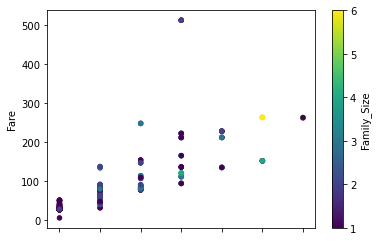

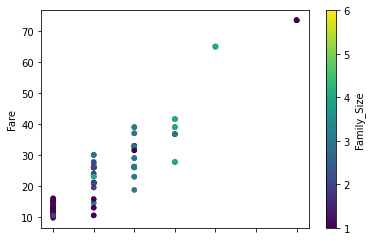

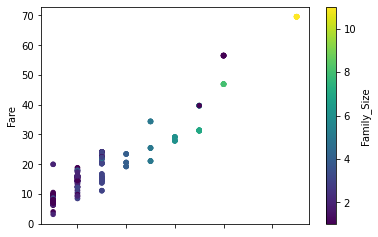

In [26]:
for n in range(1,4):
    display(cd[(cd.Fare > 0) & (cd.Pclass == n)].plot.scatter(x='Ticket_Count',\
                                                              y='Fare', c='Family_Size',\
                                                              colormap='viridis'))

In [27]:
display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Pclass == 3)].groupby(['Sex', 'Embarked'])\
        ['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Pclass == 3)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 2) & (cd.Ticket_Count == 2) & (cd.Pclass == 3)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 3) & (cd.Ticket_Count == 3) & (cd.Pclass == 3)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 4) & (cd.Ticket_Count == 4) & (cd.Pclass == 3)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

mean  count  median     min      max
Sex    Embarked                                          
female C         7.227400      7  7.2292  7.2250   7.2292
       Q         7.729449     45  7.7500  6.7500   8.1375
       S         8.221829     42  7.9250  7.2500  10.5167
male   C         7.273559     46  7.2292  4.0125   8.7125
       Q         7.700872     43  7.7500  6.7500   8.4583
       S         7.958402    253  7.8958  6.2375  10.1708

mean        7.850758
count     436.000000
median      7.829200
min         4.012500
max        10.516700
Name: Fare, dtype: float64

mean      14.623156
count     54.000000
median    14.500000
min        8.516700
max       18.000000
Name: Fare, dtype: float64

mean      18.059767
count     55.000000
median    16.700000
min       11.133300
max       24.150000
Name: Fare, dtype: float64

mean      21.094433
count     12.000000
median    20.575000
min       19.258300
max       23.450000
Name: Fare, dtype: float64

For Pclass = 3 and solo traveler, the average Fare is about 7.85. So, we set Fare_Per_Person with Title = Mr or Miss in Pclass = 3 being about 7.85.

In [28]:
display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Pclass == 2)].groupby(['Sex', 'Embarked'])\
        ['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Pclass == 2)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 2) & (cd.Ticket_Count == 2) & (cd.Pclass == 2)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 3) & (cd.Ticket_Count == 3) & (cd.Pclass == 2)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 4) & (cd.Ticket_Count == 4) & (cd.Pclass == 2)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

mean  count    median      min      max
Sex    Embarked                                              
female C         12.895850      2  12.89585  12.0000  13.7917
       Q         12.350000      2  12.35000  12.3500  12.3500
       S         12.394444     27  13.00000  10.5000  16.0000
male   C         14.363245     11  15.03330  12.7375  15.5792
       Q         11.489160      5  12.35000   9.6875  12.3500
       S         11.810802     81  13.00000   0.0000  16.0000

mean       12.16608
count     128.00000
median     13.00000
min         0.00000
max        16.00000
Name: Fare, dtype: float64

mean      24.879627
count     45.000000
median    26.000000
min       19.500000
max       30.070800
Name: Fare, dtype: float64

mean      28.887503
count     31.000000
median    26.250000
min       18.750000
max       39.000000
Name: Fare, dtype: float64

mean      36.109733
count     12.000000
median    39.000000
min       27.750000
max       41.579200
Name: Fare, dtype: float64

For Pclass = 2 and solo traveler, the average Fare is about 12.17. So, we set Fare_Per_Person with Title = Mr or Miss  in Pclass = 2 being about 12.17.

In [29]:
display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Fare > 0) & (cd.Fare < 500) & (cd.Pclass == 1)].groupby(['Sex', 'Embarked'])\
        ['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

display(cd[(cd.Family_Size == 1) & (cd.Ticket_Count == 1) & (cd.Fare > 0) & (cd.Fare < 500)  & (cd.Pclass == 1)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 2) & (cd.Ticket_Count == 2) & (cd.Fare > 0) & (cd.Fare < 500)  & (cd.Pclass == 1)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 3) & (cd.Ticket_Count == 3) & (cd.Fare > 0) & (cd.Fare < 500)  & (cd.Pclass == 1)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))
print()
display(cd[(cd.Family_Size == 4) & (cd.Ticket_Count == 4) & (cd.Fare > 0) & (cd.Fare < 500)  & (cd.Pclass == 1)]['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

mean  count   median      min      max
Sex    Embarked                                             
female C         31.028112      8  27.7208  27.4458  49.5042
       S         27.773617      6  26.5500  25.9292  31.6833
male   C         31.821328     25  29.7000  25.7417  50.4958
       S         30.010907     55  26.5500   5.0000  50.4958

mean      30.436167
count     94.000000
median    27.720800
min        5.000000
max       50.495800
Name: Fare, dtype: float64

mean       66.849949
count      71.000000
median     59.400000
min        39.400000
max       136.779200
Name: Fare, dtype: float64

mean       98.732967
count      12.000000
median     82.508300
min        79.650000
max       247.520800
Name: Fare, dtype: float64

mean      120.0
count       4.0
median    120.0
min       120.0
max       120.0
Name: Fare, dtype: float64

For Pclass = 1 and solo traveler, the average Fare is about 30.44. So, we set Fare_Per_Person with Title = Mr or Miss  in Pclass = 1 being about 30.44.

Now there are some passengers whose Fare is 0. We change their Title as 'Crew'.

In [30]:
lower_bnd = 0
#display(cd[(cd['Fare'] == lower_bnd)])

for i in cd[cd.Fare == lower_bnd].index:
    cd.at[i, 'Title'] = 'Crew'
    
#display(cd[(cd['Fare'] == lower_bnd)])

We divide Fare by Ticket_Count and assign Fare_Per_Person by it.

In [31]:
cd['Fare_Per_Person'] = cd['Fare']/cd['Ticket_Count']
cd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,2,1,7.25000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,2,2,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,1,1,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,2,2,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1,1,8.05000


### 7. Embarked

In [32]:
cd[cd['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,1,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,1,2,40.0


Let's fillout the missing values in Embarked.

In [33]:
cd[cd.Ticket == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,Miss,1,2,40.0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,Mrs,1,2,40.0


Since they have the same Ticket, 

In [34]:
cd[(cd.Pclass == 1) & (cd.Cabin.str.contains('B') & (cd.Ticket_Count == 2)) & (cd.Fare > 0) &\
   (cd.Fare < 300)].groupby(['Embarked'])['Fare'].agg(['mean', 'count', 'median', 'min', 'max'])

,mean,count,median,min,max
Embarked,,,,,
C,73.122933,12,74.25,57.9792,91.0792
S,65.566675,8,64.00,52.0000,82.2667


In [35]:
cd.Embarked.fillna('C', inplace=True)
cd.Embarked.isna().sum()

0

In [36]:
cd.groupby(['Embarked'])['Survived'].agg(['mean', 'count', 'sum'])

,mean,count,sum
Embarked,,,
C,0.558824,170,95.0
Q,0.389610,77,30.0
S,0.336957,644,217.0


### 8. Age

#### There are many missing entries in Age.

(array([ 51.,  31.,  27., 116., 184., 160., 132., 100.,  69.,  66.,  43.,
         27.,  27.,   5.,   6.,   1.,   1.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85]),
 <BarContainer object of 17 artists>)

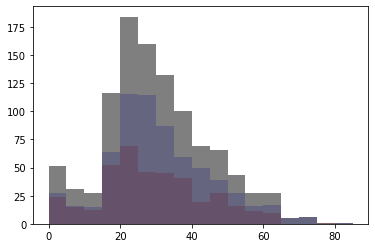

In [37]:
plt.hist(cd[cd['Sex'] == 'female'].Age, alpha=0.2, bins=[5*x for x in range(18)], color='red')
plt.hist(cd[cd['Sex'] == 'male'].Age, alpha=0.2, bins=[5*x for x in range(18)], color='blue')
plt.hist(cd.Age, alpha=0.5, bins=[5*x for x in range(18)], color='black')

In [38]:
print(cd[cd.Age.isna()].Survived.agg(['mean', 'count']))
print()
print(cd[~cd.Age.isna()].Survived.agg(['mean', 'count']))

mean       0.293785
count    177.000000
Name: Survived, dtype: float64

mean       0.406162
count    714.000000
Name: Survived, dtype: float64


Age with NaN are more likely died than those without it.

Let's try filling out the missing Age.

In [39]:
print('Max Age: {}'.format(cd.Age.max()))
print('Min Age: {}'.format(cd.Age.min()))

Max Age: 80.0
Min Age: 0.17


In [40]:
cd[(~cd.Age.isna())].groupby(['Pclass', 'Title', 'Parch'])['Age'].agg(['mean', 'count', 'median', 'min', 'max']).head(20)

mean  count  median    min   max
Pclass Title    Parch                                       
1      Crew     0      41.500000      4    39.5  38.00  49.0
       FT_Other 0      40.000000      3    39.0  33.00  48.0
       MT_Other 0      48.083333     12    49.0  32.00  60.0
                1      61.500000      2    61.5  53.00  70.0
       Master   2       6.984000      5     6.0   0.92  13.0
       Miss     0      34.047619     42    32.5  16.00  63.0
                1      21.714286      7    22.0  15.00  39.0
                2      21.333333     12    21.5   2.00  36.0
       Mr       0      41.367647    102    42.0  17.00  80.0
                1      42.736842     19    45.0  21.00  65.0
                2      31.166667      6    28.5  17.00  58.0
                3      61.000000      1    61.0  61.00  61.0
                4      64.000000      1    64.0  64.00  64.0
       Mrs      0      41.000000     41    43.0  17.00  76.0
                1      46.571429     21    47.0  23.00  64.0
                2      38.000000      4    31.5  25.00  64.0
                3      48.000000      1    48.0  48.00  48.0
                4      60.000000      1    60.0  60.00  60.0
2      MT_Other 0      43.625000      8    46.5  23.00  57.0
                1      29.000000      2    29.0  28.00  30.0

Mean and Median look similar. We can use the above median for each Pclass and Title to determine the missing Age.

In [41]:
cd[(~cd.Age.isna()) & (cd.Family_Size == 1)].groupby(['Pclass', 'Title'])['Age'].agg(['mean', 'count', 'median', 'min', 'max']).head(20)

mean  count  median   min   max
Pclass Title                                         
1      Crew      41.500000      4    39.5  38.0  49.0
       FT_Other  36.000000      2    36.0  33.0  39.0
       MT_Other  48.375000      8    50.5  32.0  60.0
       Miss      33.135135     37    32.0  16.0  58.0
       Mr        42.471014     69    42.0  17.0  80.0
       Mrs       50.125000      8    54.0  24.0  62.0
2      MT_Other  42.142857      7    42.0  23.0  57.0
       Miss      28.687500     24    28.0  12.0  50.0
       Mr        31.932292     96    29.0  14.0  70.0
       Mrs       35.066667     15    32.0  22.0  57.0
3      Crew      32.250000      4    30.5  19.0  49.0
       Miss      22.830508     59    22.0   5.0  45.0
       Mr        28.426587    252    26.0  11.0  74.0
       Mrs       39.000000      5    38.0  18.0  63.0

First of all, we fill out Age with Parch = 0 with the medians shown above.

In [42]:
from itertools import product

la = pd.unique(cd[(cd.Parch == 0)].Pclass)
lb = pd.unique(cd[(cd.Parch == 0)].Title)

# Compute the median for each Pclass, Title and fillout Age with those values.
for (x, y) in product(la, lb):
    m = cd[(~cd.Age.isna()) & (cd.Parch == 0) & (cd.Pclass == x) & (cd.Title == y)]['Age'].median()
    cd.loc[(cd.Age.isna()) & (cd.Parch == 0) & (cd.Pclass == x) & (cd.Title == y), ['Age']] = m

cd[(cd.Age.isna()) & (cd.Parch == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Parkes,Crew,1,3,0.0
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Cunningham,Crew,1,3,0.0
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Campbell,Crew,1,3,0.0
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Frost,Crew,1,1,0.0
674,675,0.0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,Watson,Crew,1,1,0.0
732,733,0.0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,Knight,Crew,1,1,0.0


We fill out Age for Title = Crew and Master with the median of Mr.

In [43]:
Crew_Age = cd[(cd.Title == 'Mr') & (cd.Pclass == 2)]['Age'].median()
cd.loc[(cd.Age.isna()) & (cd.Family_Size == 1) & (cd.Title == 'Crew'), ['Age']] = Crew_Age

In [44]:
cd[(cd.Age.isna())].sort_values(by=['Title'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person
65,66,1.0,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,3,3,5.081933
1235,1236,NaN,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,Billiard,Master,3,3,4.833333
1135,1136,NaN,3,"Johnston, Master. William Arthur Willie""""",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Master,4,4,5.862500
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Master,5,5,5.093340
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Moubarek,Master,3,3,5.081933
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Master,11,11,6.322727
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Peter,Master,3,3,7.452767
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage,Miss,11,11,6.322727
229,230,0.0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Lefebre,Miss,5,5,5.093340
128,129,1.0,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,Miss,3,3,7.452767


- For Master, we use the median of Age with Title = Master and Pclass = 3.
- For Miss, we use the median of Age with Title = Miss, Pclass = 3 and Age < 18.
- For Name = Sage, Mr. John George and Johnston, Mr. Andrew G, we use the median of Age with Title = Mr, Pclass = 3 and Age >= 18.
- For Family_Name = Sage, Title = Mr and Name != Sage, Mr. John George, we use the median of Age with Title = Mr, Pclass = 3 and Age < 18.
- For Title = Mrs, we use the median of Age with Title = Mrs and Pclass = 3.
- For Name = Chibnall, Mrs. (Edith Martha Bowerman), we set her sage and 22 + 25 = 47 by finding her daughter Bowerman, Miss. Elsie Edith.

In [45]:
cd.loc[(cd.Age.isna()) & (cd.Title == 'Master'), ['Age']] = cd[(cd.Title == 'Master') & (cd.Pclass == 3)]['Age'].median()
cd.loc[(cd.Age.isna()) & (cd.Title == 'Miss'), ['Age']] = cd[(cd.Title == 'Miss') & (cd.Pclass == 3) & (cd.Age < 18.)]['Age'].median()
cd.loc[(cd.Name == 'Sage, Mr. John George') | (cd.Name == 'Johnston, Mr. Andrew G'),\
       ['Age']] = cd[(cd.Title == 'Mr') & (cd.Pclass == 3) & (cd.Age >= 18.)]['Age'].median()
cd.loc[(cd.Age.isna()) & (cd.Title == 'Mr'), ['Age']] = cd[(cd.Title == 'Mr') & (cd.Pclass == 3) & (cd.Age < 18.)]['Age'].median()
cd.loc[cd.PassengerId == 167, ['Age']] = 47.0
cd.loc[(cd.Age.isna()) & (cd.Title == 'Mrs'), ['Age']] = cd[(cd.Title == 'Mrs') & (cd.Pclass == 3)]['Age'].median()

cd[cd.Age.isna()].index.size

0

### 9. Cabin

#### Distribution of Decks over Pclass

We found that for each Ticket there could be multiple Cabin assigned. However, we assume that they are all the same Cabin_Init.

Deck Plan: https://rmstitanic1912.weebly.com/the-levels-of-the-titanic.html

Accomodation: https://titanicfacts.net/life-on-the-titanic/#:~:text=Accommodation%20on%20the%20Titanic,of%20staterooms%20in%20Third%20Class.

![Deck Plan](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/800px-Olympic_%26_Titanic_cutaway_diagram.png)

In [46]:
print('Survived, NaN Cabin: ', cd[cd['Cabin'].isna()].query('Survived == 1').index.size)
print('Not Survived, NaN Cabin: ', cd[cd['Cabin'].isna()].query('Survived == 0').index.size)
print('Survived, Cabin: ', cd[~cd['Cabin'].isna()].query('Survived == 1').index.size)
print('Not Survived, Cabin: ', cd[~cd['Cabin'].isna()].query('Survived == 0').index.size)

Survived, NaN Cabin:  206
Not Survived, NaN Cabin:  481
Survived, Cabin:  136
Not Survived, Cabin:  68


The above shows that Cabin with NaN is less likely survived. So, Cabin with NaN also should be counted in determine the survival.

OK. The initial letters of Cabin string represent the deck of the ship. Thus, let's convert Cabin into the inital letter for train_data and test_data.

In [47]:
def second_init(s):
    l = s.split()
    if len(l) > 1:
        return l[1][0]
    else:
        return l[0][0]

cd['Cabin_Init'] =  cd['Cabin']
cd['Cabin_Init'] = cd['Cabin_Init'].fillna('N')
cd['Cabin_Init'] =  cd['Cabin_Init'].astype('str').map(second_init)

#Find the unique values in Cabin, i.e. the values of decks, excluding NaN
print(pd.unique(cd['Cabin_Init'].sort_values()))

print('The original number of Ns in Cabin_Init: {} out of {}'.format(cd[cd['Cabin_Init'] == 'N'].index.size, cd.index.size))

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
The original number of Ns in Cabin_Init: 1014 out of 1309


What about the number of Cabin's?? For example, PassengerId 873 has Cabin B51, B53, B55.

Let's check if the number of Cabins vs Survived.
**Note: For NaN in Cabin, set the value for Num_Cabins as 1.**

In [48]:
def num_cabins(s):
    l = s.split()
    if l[0] == '0':
        return 1
    elif l[0] == 'F':
        return len(l)-1
    else:
        if len(l) > 2:
            return 3
        else:
            return len(l)


cd['Num_Cabins'] = cd['Cabin']
cd['Num_Cabins'] = cd['Num_Cabins'].fillna(0)
cd['Num_Cabins'] = cd['Num_Cabins'].astype(str).map(num_cabins)

#cd = cd.drop(columns=['Cabin'])

cd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Name,Title,Family_Size,Ticket_Count,Fare_Per_Person,Cabin_Init,Num_Cabins
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,2,1,7.25000,N,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,2,2,35.64165,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,1,1,7.92500,N,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,2,2,26.55000,C,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1,1,8.05000,N,1


We may be able to fill out some missing values of Cabin_Init with Pclass, Cabin_Init and Embarked.

First, we can fill out Cabin_Init with NaN by looking at non_NaN Cabin_Init of the same Ticket.

In [49]:
for ticket in pd.unique(cd[cd.Cabin_Init == 'N'].Ticket).tolist():
    # Collect the rows with Ticket = ticket
    df = cd[cd.Ticket == ticket]
    if df[df.Cabin_Init == 'N'].index.size != 0 and df[df.Cabin_Init != 'N'].index.size != 0:
        print(ticket, df.index.size, df[df.Cabin_Init == 'N'].index.size)

PC 17755 4 1
19877 3 1
17421 4 1
PC 17760 4 1
PC 17757 5 2
2668 3 2
PC 17761 3 1
113781 6 2
S.O./P.P. 3 2 1
36928 4 2
24160 4 1
PC 17608 7 1


In [50]:
l_ticket = ['PC 17755', '19877', '17421', 'PC 17760', 'PC 17757', '2668', 'PC 17761', '113781', 'S.O./P.P. 3',\
            '36928', '24160', 'PC 17608']

l_index = [258, 290, 306, 373, 380, 557, 533, 1308, 537, 708, 1032, 841, 856, 1108, 1215, 1266]
l_cabin = ['B', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'C', 'C', 'C', 'E', 'C', 'C', 'B', 'B']

for i in range(len(l_index)):
    cd.at[l_index[i], 'Cabin_Init'] = l_cabin[i]

print('The number of Ns in Cabin_Init: {} out of {}'.format(cd[cd['Cabin_Init'] == 'N'].index.size, cd.index.size))

The number of Ns in Cabin_Init: 998 out of 1309


In [51]:
#cd[(cd.Cabin_Init == 'N') & (cd.Pclass == 1)].sort_values(by=['Family_Name'])

In [52]:
upper_bnd = 150.

print(cd[(cd['Fare'] > lower_bnd) & (cd['Fare'] < upper_bnd) & (cd['Cabin_Init'] != 'N')]\
      .groupby(['Pclass', 'Cabin_Init'])['Fare'].agg(['mean', 'count', 'median', 'min', 'max']))

                        mean  count    median      min       max
Pclass Cabin_Init                                               
1      A           43.208329     21  35.50000  26.0000   81.8583
       B           73.767821     47  79.20000   5.0000  146.5208
       C           70.075762     71  66.60000  25.7000  136.7792
       D           58.919065     40  53.10000  25.9292  113.2750
       E           63.464706     34  55.44170  25.5875  134.5000
       T           35.500000      1  35.50000  35.5000   35.5000
2      D           13.595833      6  13.39585  12.8750   15.0458
       E           11.370000      5  10.50000  10.5000   13.0000
       F           23.423077     13  26.00000  10.5000   39.0000
3      E           14.316662      8  12.47500   7.2292   22.3583
       F            7.750000      1   7.75000   7.7500    7.7500
       G           11.291667      9  10.46250   7.6500   16.7000


Add T into A.

In [53]:
for i in cd[cd.Cabin_Init == 'T'].index:
    cd.at[i, 'Cabin_Init'] = 'A'

cd[cd.Cabin_Init == 'T'].index.size

0

In [54]:
cd.loc[872, 'Title'] = 'Crew'

Let's try to fill out some Cabin_Init for Pclass = 1 and Pclass = 2.
Find the maximum Fare_Per_Person of Pclass = 2.

In [55]:
max_FPP = cd[cd.Pclass == 2].Fare_Per_Person.max()
print(max_FPP)
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > 73.5), 'Cabin_Init'] = 'B'
print(cd[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > 73.5)].index.size)

16.0
0


In [56]:
max_FPP = cd[cd.Pclass == 3].Fare_Per_Person.max()
print(max_FPP)
cd[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > max_FPP) & (cd.Pclass == 2)]
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > max_FPP) & (cd.Pclass == 2), 'Cabin_Init'] = 'C'

19.9667


In [57]:
max_FPP = cd[cd.Cabin_Init == 'G'].Fare_Per_Person.max()
print(max_FPP)
#display(cd[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person < max_FPP) & (cd.Pclass == 2)])
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person < max_FPP) & (cd.Pclass == 3), 'Cabin_Init'] = 'G'

7.65


In [58]:
display(cd.groupby(['Cabin_Init'])['Survived'].agg(['mean', 'count']))
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count
Cabin_Init,,
A,0.437500,16
B,0.750000,48
C,0.611940,67
D,0.757576,33
E,0.742857,35
F,0.777778,9
G,0.246377,207
N,0.313025,476


,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,27.880163,46,26.416650,12.875000,39.13335
E,22.062368,47,26.550000,5.250000,38.50000
F,10.232143,14,9.750000,7.750000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,10.916934,705,8.404200,0.000000,66.82500


In [59]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person < 13) & (cd.Pclass == 3), 'Cabin_Init'] = 'F'
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,27.880163,46,26.416650,12.875000,39.13335
E,22.062368,47,26.550000,5.250000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,14.536919,309,13.000000,0.000000,66.82500


In [60]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > 13) & (cd.Fare_Per_Person < 32) & (cd.Pclass == 3), 'Cabin_Init'] = 'E'
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,27.880163,46,26.416650,12.875000,39.13335
E,21.976831,49,26.550000,5.250000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,14.501546,307,13.000000,0.000000,66.82500


In [61]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Pclass == 3), 'Cabin_Init'] = 'E'
print(cd.loc[(cd.Cabin_Init == 'N') & (cd.Pclass == 3)].index.size)

0


In [62]:
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,27.880163,46,26.416650,12.875000,39.13335
E,21.976831,49,26.550000,5.250000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,14.501546,307,13.000000,0.000000,66.82500


In [63]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person < 8.7611) & (cd.Pclass == 2), 'Cabin_Init'] = 'E'

In [64]:
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,27.880163,46,26.416650,12.875000,39.13335
E,15.851434,80,8.750000,0.000000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,15.437408,276,13.000000,0.000000,66.82500


In [65]:
max_FPP = cd[(cd.Pclass == 2) & (cd.Cabin_Init == 'E')].Fare_Per_Person.max()
print(max_FPP)

13.0


In [66]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Fare_Per_Person > max_FPP) & (cd.Pclass == 2), 'Cabin_Init'] = 'D'
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,22.756359,74,25.576400,12.875000,39.13335
E,15.851434,80,8.750000,0.000000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,15.561458,248,13.000000,0.000000,66.82500


In [67]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Pclass == 2), 'Cabin_Init'] = 'E'
print(cd[(cd.Cabin_Init == 'N') & (cd.Pclass == 2)].index.size)
display(cd.groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

0


,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,22.756359,74,25.576400,12.875000,39.13335
E,13.039439,274,12.350000,0.000000,38.50000
F,8.165318,410,7.895800,7.650000,13.00000
G,6.249319,302,6.875000,0.000000,7.65000
N,28.787959,54,26.550000,0.000000,66.82500


In [68]:
display(cd[cd.Pclass == 1].groupby(['Cabin_Init'])['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))

,mean,count,median,min,max
Cabin_Init,,,,,
A,31.508422,23,30.500000,0.000000,50.49580
B,41.369179,68,36.491071,0.000000,128.08230
C,35.832613,104,33.908325,25.258333,68.38960
D,30.022812,40,26.550000,19.700000,39.13335
E,27.448224,34,26.900000,25.587500,38.50000
N,28.787959,54,26.550000,0.000000,66.82500


In [69]:
cd[(cd.Cabin_Init == 'N') & (cd.Pclass == 1)]['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max'])

mean      28.787959
count     54.000000
median    26.550000
min        0.000000
max       66.825000
Name: Fare_Per_Person, dtype: float64

In [70]:
cd.loc[(cd.Cabin_Init == 'N') & (cd.Pclass == 1) & (cd.Fare_Per_Person < 8.7611), 'Cabin_Init'] = 'E'
cd.loc[(cd.Cabin_Init == 'N') & (cd.Pclass == 1), 'Cabin_Init'] = 'D'
print(cd[(cd.Cabin_Init == 'N') & (cd.Pclass == 1)].index.size)

0


### 10, Data Engineering and Encoding

In [71]:
print(list(cd.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Name', 'Title', 'Family_Size', 'Ticket_Count', 'Fare_Per_Person', 'Cabin_Init', 'Num_Cabins']


In [72]:
display(cd.groupby(['SibSp', 'Parch'])['Survived'].agg(['mean', 'count', 'sum']))
cd['Parch_to_SibSp'] = cd.apply(lambda x: x['Parch']/x['SibSp'] if x['SibSp'] != 0 else 0., axis=1)
display(cd.groupby(['Parch_to_SibSp'])['Survived'].agg(['mean', 'count', 'sum']))

def ratio_parch_to_sibsp(x):
    if x == 0.0:
        return 'Ratio_PS_1'
    elif x <= 0.4:
        return 'Ratio_PS_2'
    elif x <= 2.0:
        return 'Ratio_PS_3'
    else:
        return 'Ratio_PS_4'

cd['PS_Type'] = cd.apply(lambda x: ratio_parch_to_sibsp(x['Parch_to_SibSp']), axis=1)
cd['PS_Type'].value_counts()

mean  count    sum
SibSp Parch                        
0     0      0.303538    537  163.0
      1      0.657895     38   25.0
      2      0.724138     29   21.0
      3      1.000000      1    1.0
      4      0.000000      1    0.0
      5      0.000000      2    0.0
1     0      0.520325    123   64.0
      1      0.596491     57   34.0
      2      0.631579     19   12.0
      3      0.333333      3    1.0
      4      0.000000      3    0.0
      5      0.333333      3    1.0
      6      0.000000      1    0.0
      9           NaN      0    0.0
2     0      0.250000     16    4.0
      1      0.857143      7    6.0
      2      0.500000      4    2.0
      3      1.000000      1    1.0
3     0      1.000000      2    2.0
      1      0.000000      7    0.0
      2      0.285714      7    2.0
4     1      0.000000      9    0.0
      2      0.333333      9    3.0
5     2      0.000000      5    0.0
8     2      0.000000      7    0.0

,mean,count,sum
Parch_to_SibSp,,,
0.000000,0.373832,749,280.0
0.250000,0.000000,16,0.0
0.333333,0.000000,7,0.0
0.400000,0.000000,5,0.0
0.500000,0.562500,16,9.0
0.666667,0.285714,7,2.0
1.000000,0.590164,61,36.0
1.500000,1.000000,1,1.0
2.000000,0.631579,19,12.0


Ratio_PS_1    1103
Ratio_PS_3     155
Ratio_PS_2      34
Ratio_PS_4      17
Name: PS_Type, dtype: int64

In [73]:
cd.groupby(['Family_Size'])['Survived'].agg(['mean', 'count', 'sum'])

,mean,count,sum
Family_Size,,,
1,0.303538,537,163.0
2,0.552795,161,89.0
3,0.578431,102,59.0
4,0.724138,29,21.0
5,0.200000,15,3.0
6,0.136364,22,3.0
7,0.333333,12,4.0
8,0.000000,6,0.0
11,0.000000,7,0.0


In [74]:
# Categorize Family_Size
dict_family_type = {1:'FT_1', 2:'FT_2', 3:'FT_2', 4:'FT_3', 5:'FT_4', 6:'FT_4', 7:'FT_5', 8:'FT_5', 11:'FT_5'}
cd['Family_Type'] = cd['Family_Size'].map(dict_family_type)
#cd.head()

In [75]:
# Categorize Age
num_bins = 10
max_age = cd['Age'].max()
bin_edges = np.linspace(start=0., stop=max_age, num=num_bins+1).astype(int)

bin_labels = []
for j in range(len(bin_edges)-1):
    bin_labels.append('Age_{}'.format(bin_edges[j+1]))
    
cd['Age_Bin'] = pd.cut(cd['Age'], bins=bin_edges, labels=bin_labels)
cd['Age_Bin'].value_counts()

Age_32    415
Age_24    312
Age_40    165
Age_48    142
Age_8      79
Age_16     76
Age_56     66
Age_64     41
Age_72     10
Age_80      3
Name: Age_Bin, dtype: int64

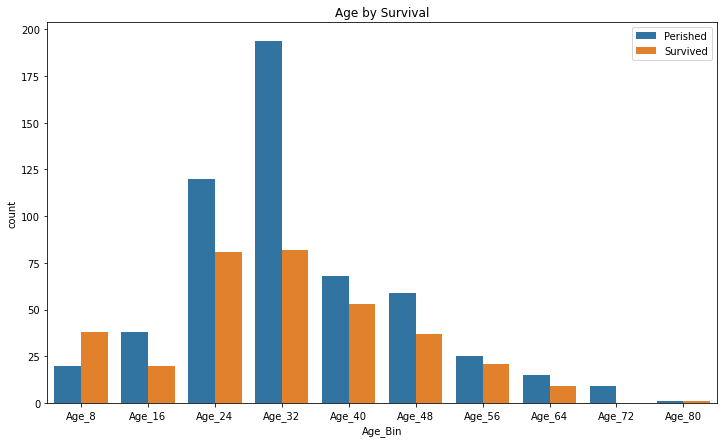

In [76]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Age_Bin', hue='Survived', data=cd)
plt.legend(["Perished","Survived"])
plt.title('Age by Survival')
plt.show()

In [77]:
display(cd.groupby('Pclass')['Fare_Per_Person'].agg(['mean', 'count', 'median', 'min', 'max']))
bin_edges = np.percentile(cd['Fare_Per_Person'], [10*n for n in range(11)])
print(bin_edges)

,mean,count,median,min,max
Pclass,,,,,
1,33.91050,323,29.70,0.0,128.0823
2,11.41101,277,12.35,0.0,16.0000
3,7.32983,709,7.75,0.0,19.9667


[  0.        6.2375    7.2292    7.75      7.8958    8.05     10.5
  13.       26.2771   30.99168 128.0823 ]


In [78]:
# Categorize Fare_Per_Person
bin_edges = [0.0, 7.2292, 10.5, 26.2771, 128.0823]
bin_labels = []
for j in range(len(bin_edges)-1):
    bin_labels.append('Fare_{}'.format(bin_edges[j+1]))
    
cd['Fare_Per_Person_Bin'] = pd.cut(cd['Fare_Per_Person'], bins=bin_edges, labels=bin_labels)
cd['Fare_Per_Person_Bin'].value_counts()

Fare_10.5        548
Fare_7.2292      260
Fare_128.0823    259
Fare_26.2771     225
Name: Fare_Per_Person_Bin, dtype: int64

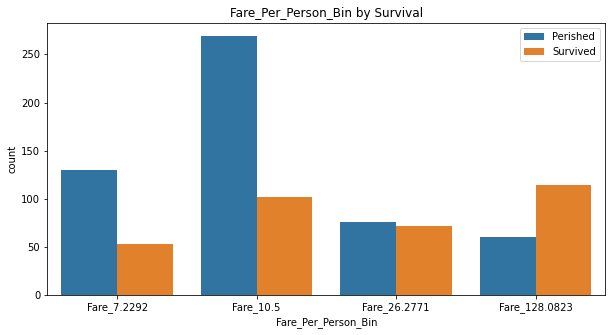

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Fare_Per_Person_Bin', hue='Survived', data=cd)
plt.legend(["Perished","Survived"])
plt.title('Fare_Per_Person_Bin by Survival')
plt.show()

Create new features by combining features: 

In [80]:
# No need male in Sex
cd['Female'] = cd['Sex'].apply(lambda x: 1 if x == 'female' else 0)

# Age_Bin with Pclass
cd['Age_Bin_Pclass'] = cd['Age_Bin'].astype(str) + "_" + cd['Pclass'].astype(str)

# Age_Bin with Sex
cd['Age_Bin_Sex'] = cd['Age_Bin'].astype(str) + "_" + cd['Sex']

# Age_Bin with Title
cd['Age_Bin_Title'] = cd['Age_Bin'].astype(str) + "_" + cd['Title']

# Age_Bin with Fare_Bin
cd['Age_Bin_Fare_Bin'] = cd['Age_Bin'].astype(str) + "_" + cd['Fare_Per_Person_Bin'].astype(str)

# Fare_Bin with Pclass
cd['Fare_Bin_Pclass'] = cd['Fare_Per_Person_Bin'].astype(str) + "_" + cd['Pclass'].astype(str)

# Fare_Bin with Sex
cd['Fare_Bin_Sex'] = cd['Fare_Per_Person_Bin'].astype(str) + "_" + cd['Sex']

# Fare_Bin with Title
cd['Fare_Bin_Title'] = cd['Fare_Per_Person_Bin'].astype(str) + "_" + cd['Title']

# Fare_Bin with Family_Type
cd['Fare_Bin_Family_Type'] = cd['Fare_Per_Person_Bin'].astype(str) + "_" + cd['Family_Type']

# Pclass with Sex
cd['Pclass_Sex'] = cd['Pclass'].astype(str) + "_" + cd['Sex']

# Pclass with Title
cd['Pclass_Title'] = cd['Pclass'].astype(str) + "_" + cd['Title']

# Family_Type with Parch
cd['Family_Type_Parch'] = cd['Family_Type'] + "_" + cd['Parch'].astype(str)

# Family_Type with Cabin_Init
cd['Family_Type_Cabin_Init'] = cd['Family_Type'] + "_" + cd['Cabin_Init']

# Family_Type with Title
cd['Family_Type_Title'] = cd['Family_Type'] + "_" + cd['Title']

In [81]:
cd.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Name', 'Title',
       'Family_Size', 'Ticket_Count', 'Fare_Per_Person', 'Cabin_Init',
       'Num_Cabins', 'Parch_to_SibSp', 'PS_Type', 'Family_Type', 'Age_Bin',
       'Fare_Per_Person_Bin', 'Female', 'Age_Bin_Pclass', 'Age_Bin_Sex',
       'Age_Bin_Title', 'Age_Bin_Fare_Bin', 'Fare_Bin_Pclass', 'Fare_Bin_Sex',
       'Fare_Bin_Title', 'Fare_Bin_Family_Type', 'Pclass_Sex', 'Pclass_Title',
       'Family_Type_Parch', 'Family_Type_Cabin_Init', 'Family_Type_Title'],
      dtype='object')

In [82]:
l_one_hot_col = ['Embarked', 'Title', 'Family_Size', 'Ticket_Count', 'Cabin_Init', 'PS_Type', 'Family_Type',\
                 'Age_Bin', 'Fare_Per_Person_Bin', 'Age_Bin_Pclass', 'Age_Bin_Sex', 'Age_Bin_Title', 'Age_Bin_Fare_Bin',\
                 'Fare_Bin_Pclass', 'Fare_Bin_Sex', 'Fare_Bin_Title', 'Fare_Bin_Family_Type', 'Pclass_Sex', 'Pclass_Title',\
                 'Family_Type_Parch', 'Family_Type_Cabin_Init', 'Family_Type_Title']

In [83]:
cd = pd.get_dummies(data=cd, prefix=l_one_hot_col, columns=l_one_hot_col)
cd.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare',
       ...
       'Family_Type_Title_FT_3_Mr', 'Family_Type_Title_FT_3_Mrs',
       'Family_Type_Title_FT_4_Master', 'Family_Type_Title_FT_4_Miss',
       'Family_Type_Title_FT_4_Mr', 'Family_Type_Title_FT_4_Mrs',
       'Family_Type_Title_FT_5_Master', 'Family_Type_Title_FT_5_Miss',
       'Family_Type_Title_FT_5_Mr', 'Family_Type_Title_FT_5_Mrs'],
      dtype='object', length=356)

Now, we select features showing Survived clearly with using correlations and their thresholds (correlation coefficients and the number of samples)

In [97]:
min_sample_ratio = 0.1
threshold = 0.15

cd_train = cd[(~cd.Survived.isna())]
corr_survived = cd_train.corr()[['Survived']]

features = []
others = []
for col in cd_train.columns:
    if col != 'Survived':
        if set(cd_train[col].unique()) == {0, 1}:
            if cd_train[col].sum()/cd_train[col].size > min_sample_ratio and\
            abs(corr_survived.loc[col].values[0]) >= threshold:
                features.append(col)
        else:
            if col not in ['PassengerId', 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Family_Name']:
                others.append(col)

print(len(features))
print(features)

print()
print(len(others))
print(others)

/tmp/ipykernel_49530/3963312793.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_survived = cd_train.corr()[['Survived']]


38
['Female', 'Embarked_C', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Family_Size_1', 'Family_Size_2', 'Ticket_Count_1', 'Ticket_Count_3', 'Cabin_Init_F', 'Cabin_Init_G', 'Family_Type_FT_1', 'Family_Type_FT_2', 'Fare_Per_Person_Bin_Fare_10.5', 'Fare_Per_Person_Bin_Fare_128.0823', 'Age_Bin_Pclass_Age_32_3', 'Age_Bin_Sex_Age_24_female', 'Age_Bin_Sex_Age_24_male', 'Age_Bin_Sex_Age_32_male', 'Age_Bin_Title_Age_24_Mr', 'Age_Bin_Title_Age_32_Mr', 'Age_Bin_Fare_Bin_Age_32_Fare_10.5', 'Fare_Bin_Pclass_Fare_10.5_3', 'Fare_Bin_Pclass_Fare_128.0823_1', 'Fare_Bin_Sex_Fare_10.5_female', 'Fare_Bin_Sex_Fare_10.5_male', 'Fare_Bin_Title_Fare_10.5_Mr', 'Fare_Bin_Family_Type_Fare_10.5_FT_1', 'Pclass_Sex_1_female', 'Pclass_Sex_2_male', 'Pclass_Sex_3_male', 'Pclass_Title_3_Mr', 'Family_Type_Parch_FT_1_0', 'Family_Type_Parch_FT_2_1', 'Family_Type_Cabin_Init_FT_1_F', 'Family_Type_Title_FT_1_Miss', 'Family_Type_Title_FT_1_Mr']

12
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_Per_Person', 'Num_Cabins'

In [98]:
features = features + others

print(len(features))

50


### 11. Split cd into train_data and test_data

In [99]:
train_data = cd[~cd.Survived.isna()]
test_data = cd[cd.Survived.isna()]

In [100]:
train_data['Survived'] = train_data['Survived'].astype('int')
train_data['Survived'].dtypes

/tmp/ipykernel_49530/310159533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Survived'] = train_data['Survived'].astype('int')


dtype('int64')

In [101]:
train_data.to_csv("titanic_data/train_preprocessed_JB.csv", index=False)
test_data.to_csv("titanic_data/test_preprocessed_JB.csv", index=False)

Save train_data and test_data for ML after dropping columns no needed.

In [102]:
train_col = ['Survived'] + features
train_data = pd.DataFrame(data=train_data[train_col])

test_col = ['PassengerId'] + features
test_data = pd.DataFrame(data=test_data[test_col])

In [103]:
train_data.to_csv("titanic_data/train_preprocessed_dropped_JB.csv", index=False)
test_data.to_csv("titanic_data/test_preprocessed_dropped_JB.csv", index=False)

In [104]:
print(train_data.columns, train_data.columns.size)
print()
print(test_data.columns, test_data.columns.size)

Index(['Survived', 'Female', 'Embarked_C', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Family_Size_1', 'Family_Size_2',
       'Ticket_Count_1', 'Ticket_Count_3', 'Cabin_Init_F', 'Cabin_Init_G',
       'Family_Type_FT_1', 'Family_Type_FT_2', 'Fare_Per_Person_Bin_Fare_10.5',
       'Fare_Per_Person_Bin_Fare_128.0823', 'Age_Bin_Pclass_Age_32_3',
       'Age_Bin_Sex_Age_24_female', 'Age_Bin_Sex_Age_24_male',
       'Age_Bin_Sex_Age_32_male', 'Age_Bin_Title_Age_24_Mr',
       'Age_Bin_Title_Age_32_Mr', 'Age_Bin_Fare_Bin_Age_32_Fare_10.5',
       'Fare_Bin_Pclass_Fare_10.5_3', 'Fare_Bin_Pclass_Fare_128.0823_1',
       'Fare_Bin_Sex_Fare_10.5_female', 'Fare_Bin_Sex_Fare_10.5_male',
       'Fare_Bin_Title_Fare_10.5_Mr', 'Fare_Bin_Family_Type_Fare_10.5_FT_1',
       'Pclass_Sex_1_female', 'Pclass_Sex_2_male', 'Pclass_Sex_3_male',
       'Pclass_Title_3_Mr', 'Family_Type_Parch_FT_1_0',
       'Family_Type_Parch_FT_2_1', 'Family_Type_Cabin_Init_FT_1_F',
       'Family_Type_Title

### Great! Ready to go for ML training and testing!